In [8]:
%matplotlib inline

import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [4]:
# Defining all the functions




def parse_data(data_file):
    new_list = []
    with open(data_file) as f:
        reader = csv.reader(f, delimiter = "\t")
        for row in reader:
            new_list.append(row)
    return new_list

    
# Takes the data and plots it on the same plot
def plot_data_together(listX, Y_master_list, title):
    for i in range(len(Y_master_list)):
        plt.plot(listX, Y_master_list[i])
    plt.xlabel("Days")
    plt.title(title)
    plt.show()
    
    
# Given a list of data sets, plots them on individual graphs
def plot_data_separate(listX, Y_master_list):
    fig = plt.figure(1, figsize = (20, 75))
    length = len(Y_master_list)
    plot_height = math.ceil(length / 2)
    for i in range(1, length):
        plt.subplot(plot_height, 2, (i))
        plt.plot(listX, Y_master_list[i])
    plt.show()
    
    
# Splits the master list into two lists, one with leaf data, one with apex data
def split_lists_by_tissue(master_list):
    leaf_list = []
    apex_list = []
    for i in range(0, len(master_list)):
        if master_list[i][1] == "leaf":
            leaf_list.append(master_list[i])
        else:
            apex_list.append(master_list[i])
    return leaf_list, apex_list   
    

# Splits the list into two - for 'westar' and 'tapidor' samples    
def split_lists_by_species(input_list):
    tapidor_list = []
    westar_list = []
    for i in range(0, len(input_list)):
        if input_list[i][2] == "tapidor":
            tapidor_list.append(input_list[i])
        else:
            westar_list.append(input_list[i])
    
    return tapidor_list, westar_list
    
    
# Delete the "NA"s in the tapidor sample 
def clean_data(input_list):
    if input_list[0][2] == "tapidor": 
    
        for i in range(len(input_list)):
            del input_list[i][8]
    
    elif input_list[0][2] == "westar":
        for i in range(len(input_list)):
            del input_list[i][-1]
                
        if input_list[0][1] == "leaf":
        
            for i in range(len(input_list)):
                del input_list[i][8]    
        
    return input_list
        
    
# Removes all data with a 0 value
def remove_zero_data(input_list):
    for i in range((len(input_list) - 1), -1, -1):
        if "0" in input_list[i]:
            del input_list[i]
    return input_list      
       

#finds the maximum value in each sublist    
def max_and_min(input_list):
    maximums = []
    minimums = []
    for i in range(len(input_list)):
        t = 0
        for j in range(3, len(input_list[i])):
            if float(input_list[i][j]) > float(t):
                t = input_list[i][j]
        maximums.append(t)
    for i in range(len(input_list)):
        t = maximums[i]
        for j in range(3, len(input_list[i])):
            if float(input_list[i][j]) < float(t):
                t = input_list[i][j]
        minimums.append(t)
    return maximums, minimums   


# Takes a list of data and normalises it, retaining the gene name etc.
def normalise_list(input_list, maxes, mins):
    headings = [[input_list[i][j]
                for j in range(3)]
                for i in range (len(input_list))]
    
    def normalise_values(num, _max, _min):
        return (float(num) - float(_min))/(float(_max) - float(_min))
    
    values = [
               [normalise_values(input_list[i][j], maxes[i], mins[i])
                for j in range(3, len(input_list[i]))]
                for i in range(len(input_list))
    ]
    for i in range(len(input_list)):
        headings[i].extend(values[i])
    return headings


# Given a normalised list of data, returns those those with their maximum at a particular day
def select_max_at_n(input_list, max_day):
    n = 0
    if max_day == 22:
        n = 3
    elif max_day == 43:
        n = 4
    elif max_day == 64:
        n = 5
    elif max_day == 65:
        n = 6
    elif max_day == 67:
        n = 7
    elif max_day == 69:
        if "westar" in input_list[0] and "apex" in input_list[0]:
            n = 8
        else:
            print("The selected day is not available for that data")
    elif max_day == 72:
        if "westar" in input_list[0] and "apex" in input_list[0]:
            n = 9
        else:
            n = 8
    elif max_day == 83:
        if "tapidor" in input_list[0]:
            n = 9
        else:
            print("The selected day is not available for that data")
    new_list = [
               [input_list[i][j]
                for j in range(len(input_list[i]))]
                for i in range (len(input_list))
                if input_list[i][n] == 1.0
        ]
    length = len(new_list)
    
    return new_list, length

# Given a normalised list of data, returns those those with their minimum at a particular day
def select_min_at_n(input_list, min_day):
    n = 0
    if min_day == 22:
        n = 3
    elif min_day == 43:
        n = 4
    elif min_day == 64:
        n = 5
    elif min_day == 65:
        n = 6
    elif min_day == 67:
        n = 7
    elif min_day == 69:
        if "westar" in input_list[0] and "apex" in input_list[0]:
            n = 8
        else:
            print("The selected day is not available for that data")
    elif min_day == 72:
        #print(input_list)
        if "westar" in input_list[0] and "apex" in input_list[0]:
            print(True)
            n = 9
        else:
            n = 8
    elif min_day == 83:
        if "tapidor" in input_list[0]:
            n = 9
        else:
            print("The selected day is not available for that data")
    new_list = [
               [input_list[i][j]
                for j in range(len(input_list[i]))]
                for i in range (len(input_list))
                if input_list[i][n] == 0
        ]
    length = len(new_list)
    
    return new_list, length

# Removes the first 3 indexes of the data - the gene name etc.
def remove_names(input_list):
    new_list = [
               [input_list[i][j]
                for j in range(3, len(input_list[i]))]
                for i in range (len(input_list))
        ]
    return new_list


def plot_normalised_data():   
    plot_data_together(tapidor_days, remove_names(normalised_t_l), "Normalised data from Tapidor leaf")
    plot_data_together(tapidor_days, remove_names(normalised_t_a), "Normalised data from Tapidor apex")
    plot_data_together(westar_leaf_days, remove_names(normalised_w_l), "Normalised data from Westar leaf")
    plot_data_together(westar_apex_days, remove_names(normalised_w_a), "Normalised from Westar apex")

    
    
def plot_normalised_data_max(max_day):
    normalised_t_l_max, length_t_l_max = select_max_at_n(normalised_t_l, max_day)
    normalised_t_a_max, length_t_a_max = select_max_at_n(normalised_t_a, max_day)
    normalised_w_l_max, length_w_l_max = select_max_at_n(normalised_w_l, max_day)
    normalised_w_a_max, length_w_a_max = select_max_at_n(normalised_w_a, max_day)
    
    plot_data_together(tapidor_days, remove_names(normalised_t_l_max), 
                       ("Normalised data from Tapidor leaf with max at %s days\n (%s sets of data)") 
                       % (max_day, length_t_l_max))
    
    plot_data_together(tapidor_days, remove_names(normalised_t_a_max), 
                       ("Normalised data from Tapidor apex with max at %s days\n (%s sets of data)") 
                       % (max_day, length_t_a_max))
    
    plot_data_together(westar_leaf_days, remove_names(normalised_w_l_max), 
                       ("Normalised data from Westar leaf with max at %s days\n (%s sets of data)") 
                       % (max_day, length_w_l_max))
    
    plot_data_together(westar_apex_days, remove_names(normalised_w_a_max), 
                       ("Normalised data from Westar apex with max at %s days\n (%s sets of data)") 
                       % (max_day, length_w_a_max))

def plot_normalised_data_min(min_day):
    normalised_t_l_min, length_t_l_min = select_min_at_n(normalised_t_l, min_day)
    normalised_t_a_min, length_t_a_min = select_min_at_n(normalised_t_a, min_day)
    normalised_w_l_min, length_w_l_min = select_min_at_n(normalised_w_l, min_day)
    normalised_w_a_min, length_w_a_min = select_min_at_n(normalised_w_a, min_day)
    
    plot_data_together(tapidor_days, remove_names(normalised_t_l_min), 
                       ("Normalised data from Tapidor leaf with min at %s days\n (%s sets of data)") 
                       % (min_day, length_t_l_min))
    
    plot_data_together(tapidor_days, remove_names(normalised_t_a_min), (
            "Normalised data from Tapidor apex with min at %s days\n (%s sets of data)") 
                       % (min_day, length_t_a_min))
    
    plot_data_together(westar_leaf_days, remove_names(normalised_w_l_min), 
                       ("Normalised data from Westar leaf with min at %s days\n (%s sets of data)") 
                       % (min_day, length_w_l_min))
    
    plot_data_together(westar_apex_days, remove_names(normalised_w_a_min), 
                       ("Normalised data from Westar apex with min at %s days\n (%s sets of data)") 
                       % (min_day, length_w_a_min))
       
def plot_normalised_data_max_min(max_day, min_day):
    normalised_t_l_max_min, length_t_l_max_min = select_max_at_n(normalised_t_l, max_day)
    normalised_t_l_max_min, length_t_l_max_min = select_min_at_n(normalised_t_l_max_min, min_day)
    
    normalised_t_a_max_min, length_t_a_max_min = select_max_at_n(normalised_t_a, max_day)
    normalised_t_a_max_min, length_t_a_max_min = select_min_at_n(normalised_t_a_max_min, min_day)
    
    normalised_w_l_max_min, length_w_l_max_min = select_max_at_n(normalised_w_l, max_day)
    normalised_w_l_max_min, length_w_l_max_min = select_min_at_n(normalised_w_l_max_min, min_day)
    
    normalised_w_a_max_min, length_w_a_max_min = select_max_at_n(normalised_w_a, max_day)
    normalised_w_a_max_min, length_w_a_max_min = select_min_at_n(normalised_w_a_max_min, min_day)
    
    plot_data_together(tapidor_days, remove_names(normalised_t_l_max_min), 
                       ("Normalised data from Tapidor leaf with max at %s days and min at %s days\n (%s sets of data)") 
                       % (max_day, min_day, length_t_l_max_min))
    
    plot_data_together(tapidor_days, remove_names(normalised_t_a_max_min), 
                       ("Normalised data from Tapidor apex with max at %s days and min at %s days\n (%s sets of data)") 
                       % (max_day, min_day, length_t_a_max_min))
    
    plot_data_together(westar_leaf_days, remove_names(normalised_w_l_max_min), 
                       ("Normalised data from Westar leaf with max at %s days and min at %s days\n (%s sets of data)") 
                       % (max_day, min_day, length_w_l_max_min))
    
    plot_data_together(westar_apex_days, remove_names(normalised_w_a_max_min), 
                       ("Normalised data from Westar apex with max at %s days and min at %s days\n (%s sets of data)") 
                       % (max_day, min_day, length_w_a_max_min))  
    
def plot_gene_data(listX, listY, chosen_gene_data, gene, print_names):
    if len(listY) == 0:
        print("%s has no matches within the threshold\n" % gene)
        return
    gene_names = [listY[i][0] for i in range(len(listY))]
    chosen_gene_data = [chosen_gene_data[i] for i in range(3, len(chosen_gene_data))]
    plt.plot(listX, chosen_gene_data, linewidth=3, label = gene)
    plt.legend()
    plot_data_together(listX, remove_names(listY),
                       ("Gene %s has %s match(es) in the given threshold\n"
                        % (gene, len(listY))))
    if print_names:
        print(gene_names, "\n")
    
    
# Returns a list of similar data within the threshold given
def compare_data_by_gene(input_list, gene, thresh):
    chosen_gene_data = []
    num = 0
    for i in range(len(input_list)):
        if gene in input_list[i]: # Finding the index in input_list that contains the data for that gene
            num = i
            chosen_gene_data = input_list[i]
            break
    new_list = [[((float(chosen_gene_data[j]) - float(input_list[i][j]))**2)
                for j in range(3, len(input_list[i]))]
                for i in range(len(input_list))]
    similar_data = [input_list[i] 
                    for i in range(len(input_list))
                    if np.mean(new_list[i]) < thresh and i != num]
    return(similar_data, chosen_gene_data)
    

# Finds matches for a specified gene (e.g. "XLOC_000007")
def matches_for_gene(gene, thresh, print_names):
    similar_data, chosen_gene_data = compare_data_by_gene(normalised_t_a, gene, thresh)
    plot_gene_data(tapidor_days, similar_data, chosen_gene_data, gene, print_names)
    
    
# Finds matches for a range of genes from the original data
def matches_for_gene_range(range_min, range_max, thresh, print_names):
    gene_names = [normalised_t_l[i][0] for i in range(len(normalised_t_l))]
    
    some_genes = [gene_names[i] for i in range(range_min, range_max)]
    for gene in some_genes:
        similar_data, chosen_gene_data = compare_data_by_gene(normalised_t_l, gene, thresh)
        plot_gene_data(tapidor_days, similar_data, chosen_gene_data, gene, print_names)    

        
# Returns the number of clusters within a given threshold (0 <= thresh <= 1)
# Currently uses tapidor_leaf data, although any of the four could be used
def number_of_clusters(thresh):
    normalised_t_l = normalise_list(tapidor_leaf, maxes_t_l, mins_t_l)
    genes_left = normalised_t_l
    clusters = 0

    while len(genes_left) > 0:
        gene_names = [genes_left[i][0] for i in range (len(genes_left))]
        chosen_gene = gene_names[0][0]
        chosen_gene_data = genes_left[0]
        
        num = 0
        similar_data = []
        to_delete = []
        
        new_list = [[((float(chosen_gene_data[j]) - float(genes_left[i][j]))**2)
                    for j in range(3, len(genes_left[i]))]
                    for i in range(len(genes_left))]
        
        similar_data = [genes_left[i] 
                        for i in range(len(genes_left))
                        if np.mean(new_list[i]) < thresh and i != num]
        
        del genes_left[0] # Removes the comparison data from the set
        
        for i in range(len(similar_data)):
            for j in range(len(genes_left)):
                    if similar_data[i][0] in genes_left[j]:
                        to_delete.append(j)               
        
        to_delete = sorted(to_delete, reverse=True)
        
        for i in to_delete:
            del genes_left[i]
        clusters += 1
    
    return clusters

# Plots the number of clusters with the threshold in the given range (0<=thresh<=1)
def plot_clusters(range_min, range_max, no_points):
    print("Processing data")
    cluster_data = []
    thresh_data = []
    for i in np.linspace(range_min, range_max, no_points):
        thresh_data.append(i)
        cluster_data.append(number_of_clusters(i))

    plt.plot(thresh_data, cluster_data)
    plt.xlabel("Threshold")
    plt.ylabel("Number of clusters")
    plt.show()
    
    


In [5]:
# Defining the most-used variables

master_days = [22, 43, 64, 65, 67, 69, 72, 83]
tapidor_days = [22, 43, 64, 65, 67, 72, 83]
westar_apex_days = [22, 43, 64, 65, 67, 69, 72]
westar_leaf_days = [22, 43, 64, 65, 67, 72]

gene_data = parse_data("C:\\Users\\browndo\\Documents\\brassica_flowering_expression.tsv")

del gene_data[0] #removes the 'header' with the column titles

master_leaf_list, master_apex_list = split_lists_by_tissue(gene_data)

tapidor_leaf, westar_leaf = split_lists_by_species(master_leaf_list)
tapidor_apex, westar_apex = split_lists_by_species(master_apex_list)

tapidor_leaf = remove_zero_data(clean_data(tapidor_leaf))
tapidor_apex = remove_zero_data(clean_data(tapidor_apex))
westar_leaf = remove_zero_data(clean_data(westar_leaf))
westar_apex = remove_zero_data(clean_data(westar_apex))

maxes_t_l, mins_t_l = max_and_min(tapidor_leaf)
maxes_t_a, mins_t_a = max_and_min(tapidor_apex)
maxes_w_l, mins_w_l = max_and_min(westar_leaf)
maxes_w_a, mins_w_a = max_and_min(westar_apex)

normalised_t_l = normalise_list(tapidor_leaf, maxes_t_l, mins_t_l)
normalised_t_a = normalise_list(tapidor_apex, maxes_t_a, mins_t_a)
normalised_w_l = normalise_list(westar_leaf, maxes_w_l, mins_w_l)
normalised_w_a = normalise_list(westar_apex, maxes_w_a, mins_w_a)


In [6]:
#tests

def test_all():
    gene_data = parse_data("C:\\Users\\browndo\\Documents\\brassica_flowering_expression.tsv")
    master_leaf_list, master_apex_list = split_lists_by_tissue(gene_data)
    
    for i in range(len(master_leaf_list)):
        if "apex" in master_leaf_list[i]:
            return False
        
    tapidor_leaf, westar_leaf = split_lists_by_species(master_leaf_list)
    for i in range(len(tapidor_leaf)):
        if "apex" in tapidor_leaf[i]:
            return False
        
    tapidor_leaf = remove_zero_data(clean_data(tapidor_leaf))
    for i in range(len(tapidor_leaf)):
        if "0" in tapidor_leaf[i]:
            return False
    
    tapidor_leaf = remove_names(tapidor_leaf)
    for i in range(len(tapidor_leaf)):
        for j in range(len(tapidor_leaf[i])):
            try:
                float(tapidor_leaf[i][j])
            except ValueError:
                return False
    
    return True
        
test_all()

True

In [46]:


#plt.plot(tapidor_days, remove_names(normalised_t_l[i]))




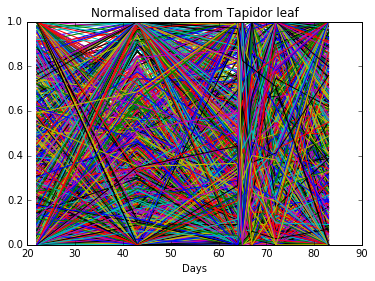

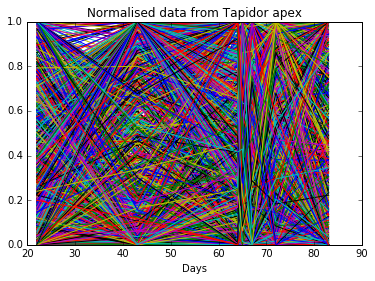

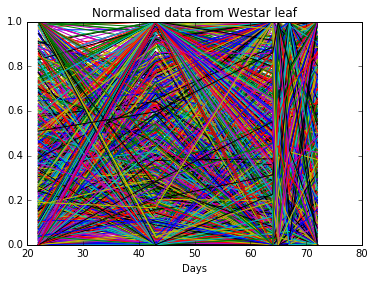

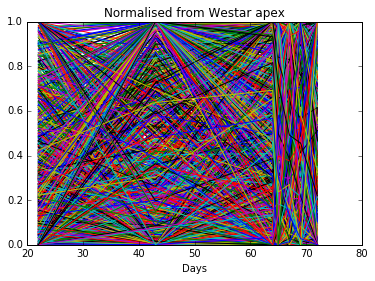

In [47]:
# Plots all the raw data in 4 graphs: tl, ta, wl, and wa
plot_normalised_data()

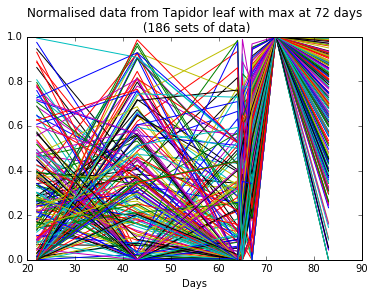

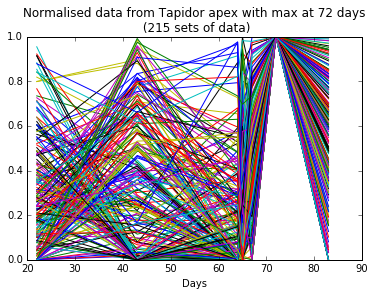

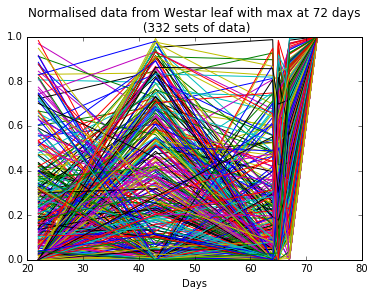

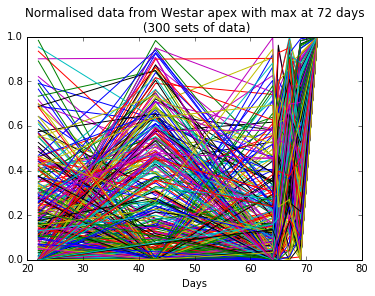

In [49]:
# Plots all the data with max at given day for tl, ta, wl, wa
plot_normalised_data_max(max_day=72)

The selected day is not available for that data
The selected day is not available for that data
The selected day is not available for that data


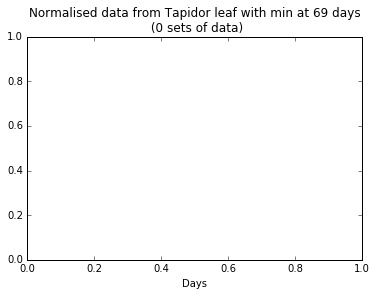

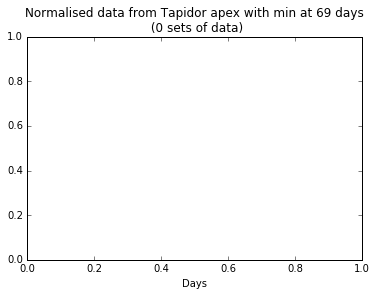

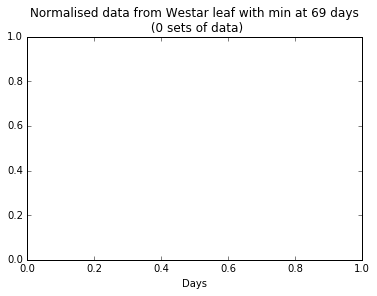

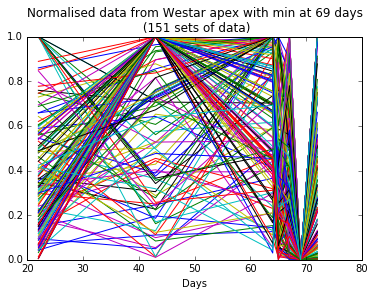

In [50]:
# Plots all the data with min at given day for tl, ta, wl, wa
plot_normalised_data_min(min_day=69)

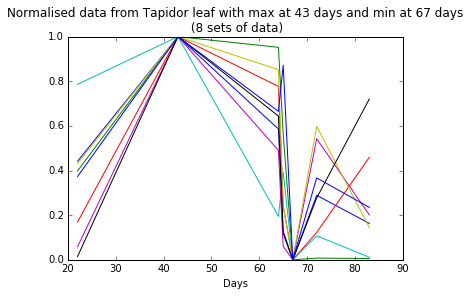

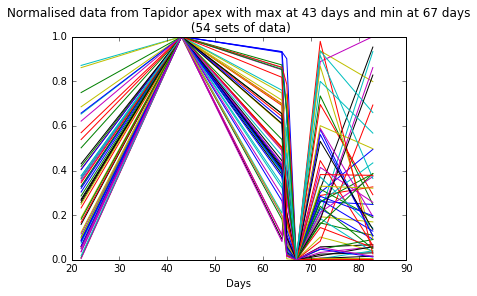

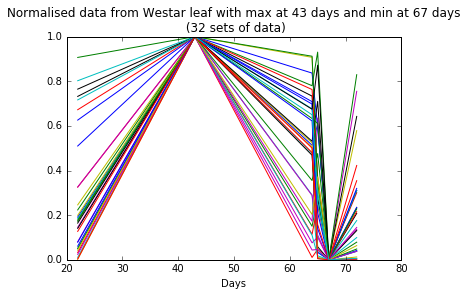

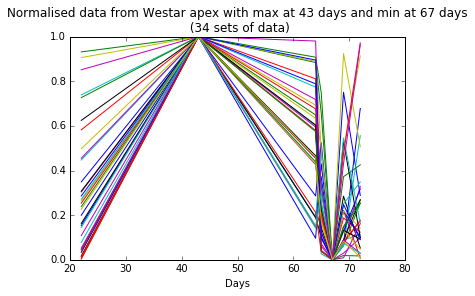

In [51]:
# Plots all the data with max and min at given days for tl, ta, wl, wa
plot_normalised_data_max_min(max_day=43, min_day=67)

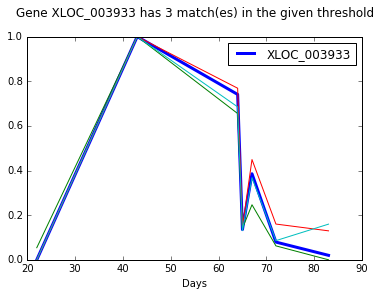

['XLOC_015395', 'XLOC_095501', 'XLOC_120446'] 



In [59]:
# Finds matches for a specified gene in the tl data (e.g. "XLOC_000007")
matches_for_gene(gene="XLOC_003933", thresh=0.005, print_names=True)

In [ ]:
# Finds matches for a range of genes from the original data
matches_for_gene_range(range_min=0, range_max=150, thresh=0.075, print_names=False)

Processing data


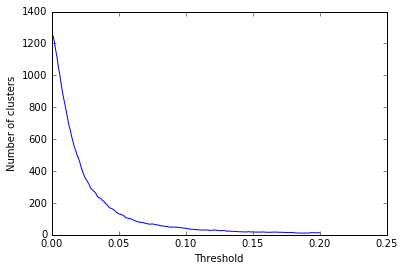

In [53]:
# Plots a graph with number of clusters vs threshold
# More points makes it a lot slower to display - (0.001, 0.1, 200) takes about 6 mins
plot_clusters(range_min=0.001, range_max=0.2, no_points=200)

In [ ]:
# Plots all the possible maximums and minimums
for i in master_days:
    for j in master_days:
        if i != j:
            plot_normalised_data_max_min(i, j)
            print("-" * 20)
    print("-" * 80)